In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('netflix_titles.csv')

In [22]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [44]:
df.shape

(8807, 12)

# Task 1: What is the most popular release year for movies on Netflix

In [23]:
movie_df = df[df['type']=='Movie']

In [24]:
movie_df.head()
movie_df['count'] = 1
release_years_total = movie_df.groupby(['release_year']).sum().reset_index()[['release_year','count']]

/var/folders/gt/4rh87rc97_z7rgmmml6hfjr40000gn/T/ipykernel_1647/4122319714.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['count'] = 1


In [25]:
release_years_total.sort_values(['count'],ascending=False)

,release_year,count
69,2018,767
68,2017,767
67,2016,658
70,2019,633
71,2020,517
...,...,...
12,1961,1
14,1963,1
17,1966,1
5,1947,1


<AxesSubplot:>

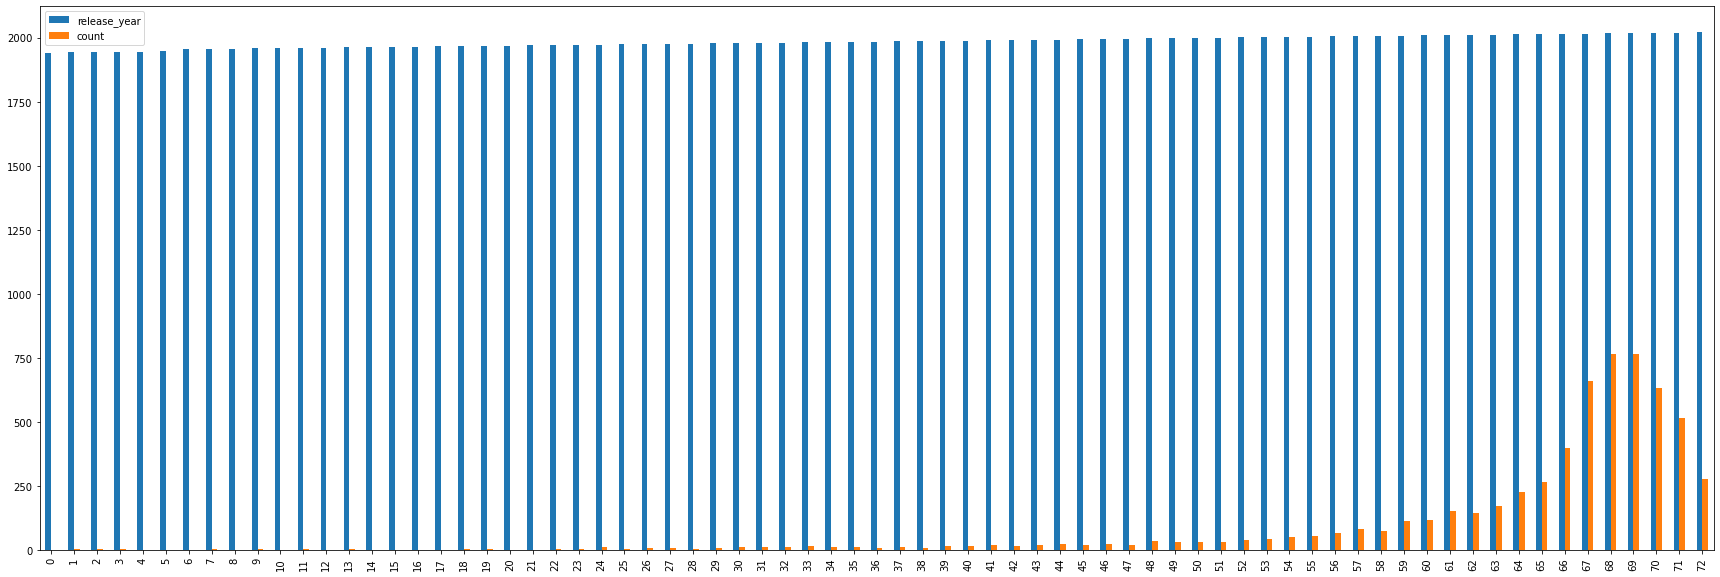

In [35]:
##Therefore, the most popular release year on Netflix was 2017/2018 with 767 releases!
release_years_total.plot(kind='bar', figsize=(30,10), )


# Task #2: What year did netflix add the most content to its platform?

In [51]:
df['new_date'] = pd.to_datetime (df['date_added'])
df['date_added_year'] = df['new_date'].dt. year
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,new_date,date_added_year,date_added_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,1,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,2021.0,2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",1,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,2021.0,2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",1,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24,2021.0,2021.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,1,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021-09-24,2021.0,2021.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",1,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021-09-24,2021.0,2021.0


In [52]:
df['count'] = 1
date_added_years_summed = df.groupby(['date_added_year']).sum ().reset_index()[['date_added_year', 'count']]
date_added_years_summed.sort_values (['count'],ascending=False)

,date_added_year,count
11,2019.0,2016
12,2020.0,1879
10,2018.0,1649
13,2021.0,1498
9,2017.0,1188
8,2016.0,429
7,2015.0,82
6,2014.0,24
3,2011.0,13
5,2013.0,11


# Task #3: What is the most popular month to add new content based on year?

In [56]:
df['date_added_month'] = df['new_date'].dt.month

In [57]:
date_added_months_summed = df.groupby(['date_added_month']).sum().reset_index()[['date_added_month','count']]
date_added_months_summed.sort_values(['count'],ascending=False)

,date_added_month,count
6,7.0,827
11,12.0,813
8,9.0,770
3,4.0,764
9,10.0,760
7,8.0,755
2,3.0,742
0,1.0,738
5,6.0,728
10,11.0,705


# Task #4: What is the movie with the longest title in the dataset?

In [65]:
movie_df = df[df['type']=='Movie']
movie_df['title_length'] = [len(title) for title in movie_df['title']]

/var/folders/gt/4rh87rc97_z7rgmmml6hfjr40000gn/T/ipykernel_1647/1706983720.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['title_length'] = [len(title) for title in movie_df['title']]


In [66]:
top_title_lengths = movie_df.sort_values(['title_length'], ascending=False)
top_title_lengths.iloc[0]['title']

'Jim & Andy: The Great Beyond - Featuring a Very Special, Contractually Obligated Mention of Tony Clifton'

# Task #5: Which actor/actress shows up most frequently in the netflix database

In [68]:
title_and_cast_df = df[['title','cast']]
title_and_cast_df = title_and_cast_df.dropna()

In [72]:
cast_names_counter = {}

for index, row in title_and_cast_df.iterrows():
    movie_cast = row['cast']
    movie_cast_split = movie_cast.split(',')
    movie_cast_stripped = [name.strip().lower() for name in movie_cast_split]
    for name in movie_cast_stripped:
        cast_names_counter[name] = cast_names_counter.get(name, 0) + 1
dict(sorted(cast_names_counter.items(), key=lambda item: item[1], reverse=True))

{'anupam kher': 43,
 'shah rukh khan': 35,
 'julie tejwani': 33,
 'naseeruddin shah': 32,
 'takahiro sakurai': 32,
 'rupa bhimani': 31,
 'akshay kumar': 30,
 'om puri': 30,
 'yuki kaji': 29,
 'amitabh bachchan': 28,
 'paresh rawal': 28,
 'boman irani': 27,
 'rajesh kava': 26,
 'vincent tong': 26,
 'andrea libman': 25,
 'kareena kapoor': 25,
 'samuel l. jackson': 24,
 'john cleese': 24,
 'jigna bhardwaj': 23,
 'fred tatasciore': 23,
 'tara strong': 23,
 'daisuke ono': 22,
 'junichi suwabe': 21,
 'ajay devgn': 21,
 'ashleigh ball': 21,
 'kay kay menon': 21,
 'nicolas cage': 21,
 'nawazuddin siddiqui': 21,
 'adam sandler': 20,
 'david attenborough': 20,
 'salman khan': 20,
 'david spade': 19,
 'yuichi nakamura': 19,
 'erin fitzgerald': 19,
 'mamoru miyano': 19,
 'morgan freeman': 19,
 'james franco': 19,
 'seth rogen': 19,
 'ai kayano': 19,
 'fred armisen': 19,
 'gulshan grover': 19,
 'vatsal dubey': 18,
 'rajesh sharma': 18,
 'fortune feimster': 18,
 'diana kaarina': 18,
 'yashpal sharma